# EDA数据分析

In [36]:
# 输出每个cell的运行时间
%load_ext autotime
# https://github.com/cpcloud/ipython-autotime
import sys
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

sys.path.append('../')

from utils import scan_files,load_file

root_path = "../data/round1/train/"

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.11 s


## 文章基本数据统计

### 篇章个数统计

In [18]:
file_names = scan_files(root_path)
print("共计有文章：{}篇".format(len(file_names)))

共计有文章：363篇
time: 4 ms


### 篇章长度统计

最大值：21504
最小值：600
平均值：8831.338842975207
中位数:8344.0


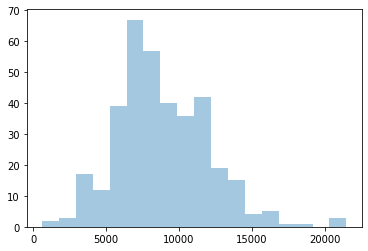

time: 440 ms


In [39]:
file_data = []
for name in file_names:
    file_data.append(load_file(root_path,name))
file_data_len = [len(x) for x in file_data]
print("最大值：{}\n最小值：{}\n平均值：{}\n中位数:{}".format(np.max(file_data_len),np.min(file_data_len),np.mean(file_data_len),np.median(file_data_len)))
sns.distplot(file_data_len,kde=False)

In [40]:
from preprocess import DataSet
dataset = DataSet(root_path,file_names)

time: 1.46 s


### 篇章中包含的实体个数统计

全部实体个数为：140028
最大值：1248
最小值：22
平均值：385.75206611570246
中位数:367.0


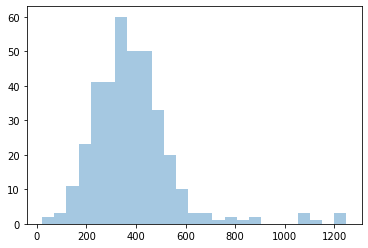

time: 211 ms


In [49]:
entities_counts = []
for doc in dataset.docs:
    entities_counts.append(len(doc.entities.get_all()))
total_count = 0
for c in entities_counts:
    total_count += c
print("全部实体个数为：{}".format(total_count))
print("最大值：{}\n最小值：{}\n平均值：{}\n中位数:{}".format(np.max(entities_counts),np.min(entities_counts),np.mean(entities_counts),np.median(entities_counts)))
sns.distplot(entities_counts,kde=False)